In [26]:
import pandas as pd
churn = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [27]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN (in case of empty strings or invalid data)
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn.info()
# Check for missing values after conversion (TotalCharges could have NaNs now)
# missing_total_charges = churn['TotalCharges'].isnull().sum()

# Display the missing values in TotalCharges
# missing_total_charges


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
# Check for missing values in each column
missing_values = churn.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

,0
TotalCharges,11


In [31]:
# Fill missing values in 'TotalCharges' with the median of the column
churn['TotalCharges'] = churn['TotalCharges'].fillna(churn['TotalCharges'].median())

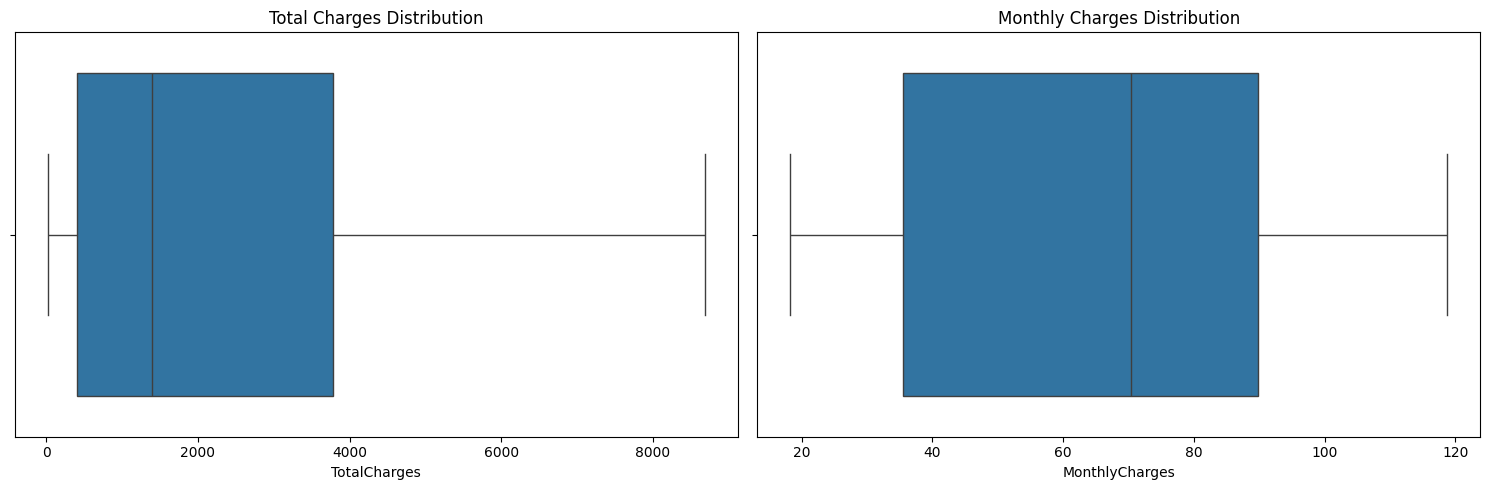

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot for TotalCharges
sns.boxplot(data=churn, x='TotalCharges', ax=axes[0])
axes[0].set_title('Total Charges Distribution')

# Boxplot for MonthlyCharges
sns.boxplot(data=churn, x='MonthlyCharges', ax=axes[1])
axes[1].set_title('Monthly Charges Distribution')

plt.tight_layout() # Adjust spacing between subplots
plt.show()

In [33]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
# Check unique values for 'gender'
unique_values = churn['gender'].unique()
print(unique_values)

# Check unique values for another categorical column like 'Contract'
unique_contracts = churn['Contract'].unique()
print(unique_contracts)

# Check unique values for another categorical column like 'Contract'
unique_paymentmethod = churn['PaymentMethod'].unique()
print(unique_paymentmethod)

# Check unique values for another categorical column like 'Contract'
unique_MultipleLines = churn['MultipleLines'].unique()
print(unique_MultipleLines)

# Check unique values for another categorical column like 'Contract'
unique_InternetService = churn['InternetService'].unique()
print(unique_InternetService)

['Female' 'Male']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']


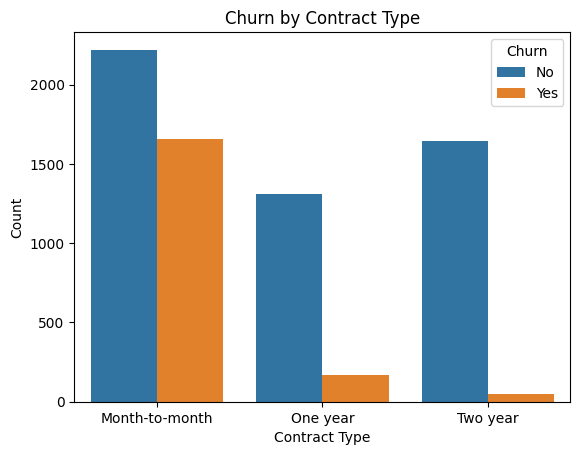

In [35]:
# Seaborn countplot to show Churn by Contract type
sns.countplot(x='Contract', hue='Churn', data=churn)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Churn by Contract Type')
plt.show()


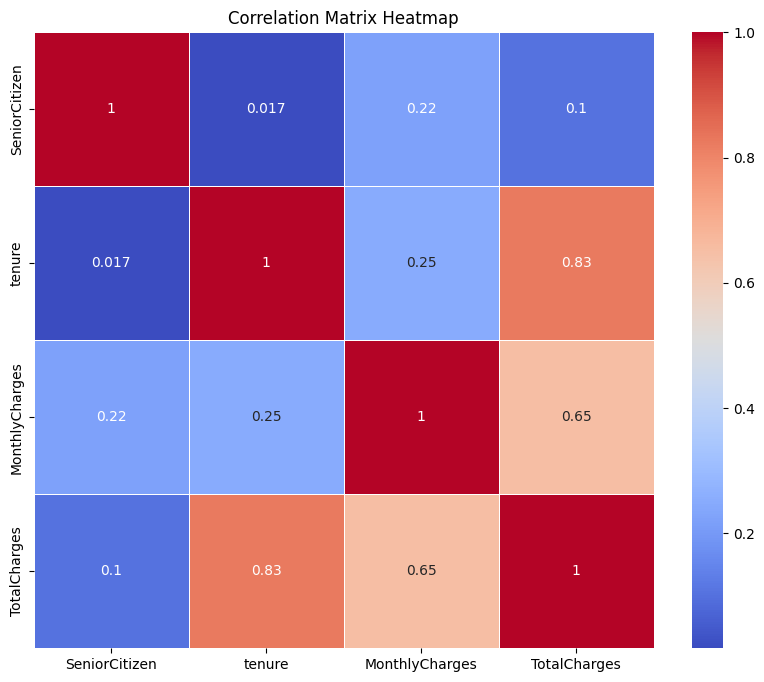

In [36]:
# Calculate correlation matrix
correlation_matrix = churn.corr(numeric_only=True)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.savefig('churn.png', dpi=300, bbox_inches='tight')
plt.show()

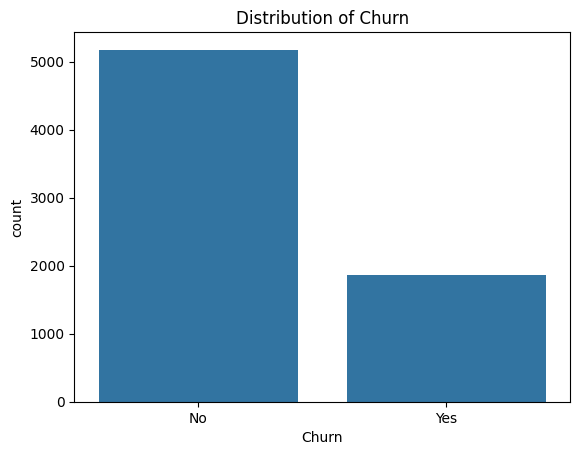

In [37]:
# Plot the distribution of the 'Churn' column
sns.countplot(x='Churn', data=churn)
plt.title('Distribution of Churn')
plt.show()


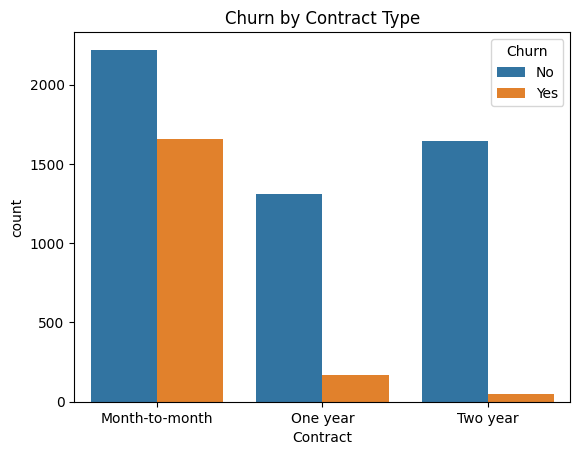

In [38]:
# Churn distribution across different contract types
sns.countplot(x='Contract', hue='Churn', data=churn)
plt.title('Churn by Contract Type')
plt.show()

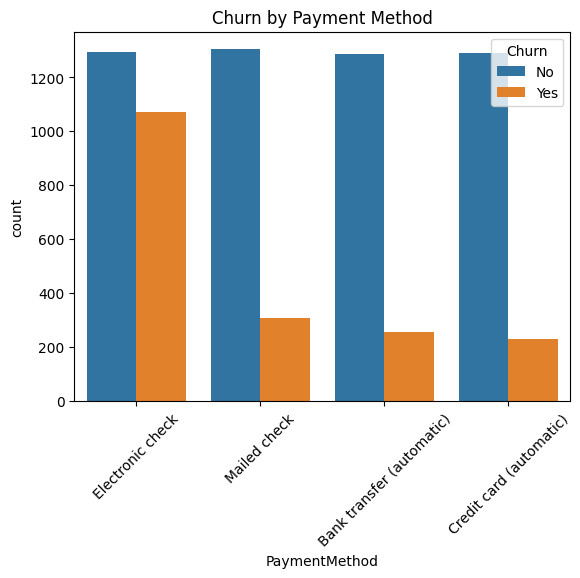

In [39]:
# Churn distribution across different payment methods
sns.countplot(x='PaymentMethod', hue='Churn', data=churn)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()

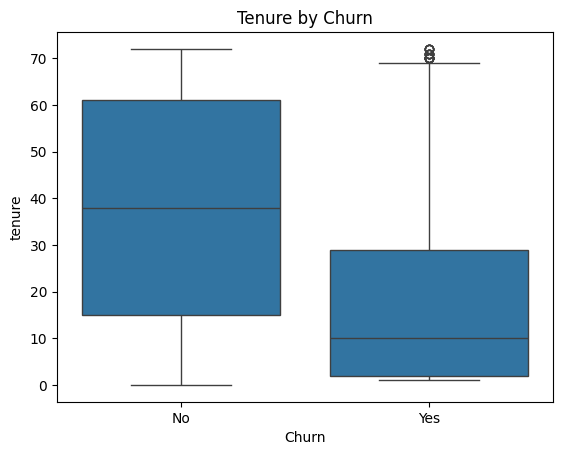

In [40]:
# Boxplot of tenure by churn status
sns.boxplot(x='Churn', y='tenure', data=churn)
plt.title('Tenure by Churn')
plt.show()
fig.savefig('Tenure bu churn.png', dpi=300, bbox_inches='tight')

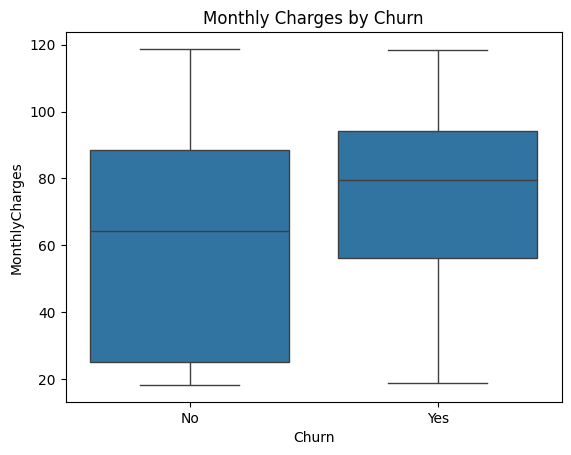

In [41]:
# Boxplot of MonthlyCharges by churn status
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn)
plt.title('Monthly Charges by Churn')
plt.show()
fig.savefig('Monthly Charges by Churn.png', dpi=300, bbox_inches='tight')

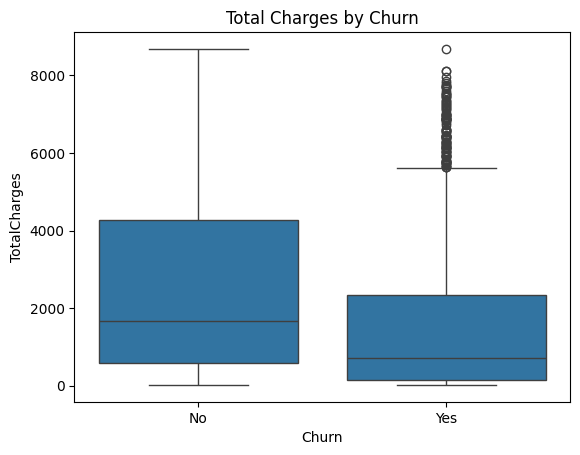

In [42]:
# Boxplot of TotalCharges by churn status
sns.boxplot(x='Churn', y='TotalCharges', data=churn)
plt.title('Total Charges by Churn')
plt.show()
fig.savefig('Total Charges by Churn.png', dpi=300, bbox_inches='tight')

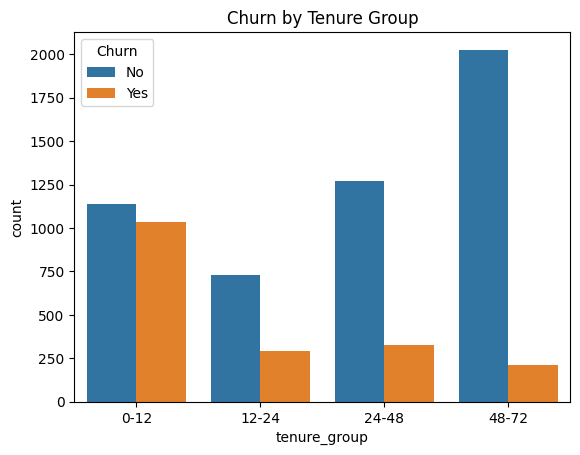

In [43]:
# Create tenure groups
churn['tenure_group'] = pd.cut(churn['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-12', '12-24', '24-48', '48-72'])

# Plot churn by tenure group
sns.countplot(x='tenure_group', hue='Churn', data=churn)
plt.title('Churn by Tenure Group')
plt.show()
fig.savefig('Churn by Tenure Group.png', dpi=300, bbox_inches='tight')

In [44]:
# Separate the customerID column before any preprocessing
customer_ids = churn['customerID']  # Assuming 'churn' is the original dataframe

In [48]:
# Drop the customerID from the dataset used for modeling
churn_ml = churn.drop(['customerID'], axis=1)

# Create dummy variables (excluding 'customerID' if present)
churn_ml = pd.get_dummies(churn_ml, drop_first=True)  # drop_first=True avoids multicollinearity

# Check the new dataset with dummy variables
churn_ml.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_group_12-24,tenure_group_24-48,tenure_group_48-72
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,True,False,False,False,False,True,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,True,False,False,True,True,False,False,False
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,True,False,True,False,True,False,False,False


In [49]:
# Convert all boolean columns to integers (0/1)
churn_ml = churn_ml.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
churn_ml.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_group_12-24,tenure_group_24-48,tenure_group_48-72
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0


In [50]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of numerical columns to scale
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply scaling to numerical columns
churn_ml[numeric_columns] = scaler.fit_transform(churn_ml[numeric_columns])

churn_ml.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_group_12-24,tenure_group_24-48,tenure_group_48-72
0,0,-1.277445,-1.160323,-0.994242,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0.066327,-0.259629,-0.173244,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,-1.236724,-0.362660,-0.959674,1,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
3,0,0.514251,-0.746535,-0.194766,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,-1.236724,0.197365,-0.940470,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0


In [51]:
# Perform train-test split (assuming you have already encoded and cleaned the dataset)
from sklearn.model_selection import train_test_split

# The 'Churn_Yes' column is likely already removed or renamed.
# Instead of dropping it again, directly select the features and target.
X = churn_ml.drop('Churn_Yes', axis =1) # select all columns except 'Churn_Yes' for features
y = churn_ml['Churn_Yes'] # select 'Churn_Yes' as target

X_train, X_test, y_train, y_test, customer_train_ids, customer_test_ids = train_test_split(
    X,  # Features
    y,  # Target
    customer_ids,  # Customer IDs, keeping them aligned with the split
    test_size=0.2,
    random_state=42
)

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Initialize RFE and specify the number of features you want to select
# Let's say we want to select the top 10 features
rfe = RFE(logreg, n_features_to_select=10)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]  # Features that were selected by RFE
print("Selected Features by RFE:", selected_features)

# Transform the training and test sets to only keep the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)


Selected Features by RFE: Index(['tenure', 'TotalCharges', 'PhoneService_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'tenure_group_48-72'],
      dtype='object')


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming X_train contains the training features without 'Churn_Yes'

# Initialize a DataFrame to store the VIF values
vif_data = pd.DataFrame()
# Get the selected feature names from the original DataFrame using rfe.support_
selected_feature_names = X_train.columns[rfe.support_]
vif_data['Feature'] = selected_feature_names # Assign selected feature names instead of using columns from X_train_selected

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X_train_selected, i) for i in range(X_train_selected.shape[1])]

# Display the VIF values
print(vif_data)

                              Feature       VIF
0                              tenure  8.000565
1                        TotalCharges  6.541048
2                    PhoneService_Yes  7.221714
3         InternetService_Fiber optic  3.711784
4  OnlineSecurity_No internet service  2.907059
5                  OnlineSecurity_Yes  1.829644
6                   Contract_One year  1.789458
7                   Contract_Two year  2.904229
8      PaymentMethod_Electronic check  1.791682
9                  tenure_group_48-72  4.811158


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model using the selected features
logreg.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test_selected)

# Evaluate the model's performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8097941802696949
Confusion Matrix:
 [[940  96]
 [172 201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [59]:
# Assuming X_train is a Pandas DataFrame
# Perform feature selection and dropping within the DataFrame
# ... (Your existing RFE code) ...

# Get the selected feature names
selected_features = X_train.columns[rfe.support_]

# Drop 'TotalCharges' if it's in the selected features
if 'TotalCharges' in selected_features:
    selected_features = selected_features.drop('TotalCharges')
    # or selected_features = selected_features[selected_features != 'TotalCharges']

# Select the features for training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Now you can proceed with train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X_train_selected, y_train, test_size=0.2, random_state=42
# )

# Proceed with model training and evaluation

In [62]:
X_train_selected.head()

,tenure,PhoneService_Yes,InternetService_Fiber optic,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,tenure_group_48-72
2142,-0.463037,1,0,0,1,1,0,0,0
1623,0.880735,1,1,0,0,0,1,0,1
6074,-1.277445,0,0,0,0,0,0,1,0
1362,-1.155283,1,1,0,0,0,0,1,0
6754,-1.318165,1,0,0,1,0,1,0,0


In [61]:
# Logistic Regression with balanced class weights after addressing multicollinearity
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model with class weighting
logreg_balanced = LogisticRegression(random_state=42, class_weight='balanced')

# Train the model on the adjusted training data
logreg_balanced.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred_balanced = logreg_balanced.predict(X_test_selected)

# Evaluate the model's performance
print("Balanced Class Weights Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))


Balanced Class Weights Accuracy: 0.7423704755145494
Confusion Matrix:
 [[740 296]
 [ 67 306]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80      1036
           1       0.51      0.82      0.63       373

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.74      0.76      1409



In [63]:
y_pred_proba_balanced = logreg_balanced.predict_proba(X_test_selected)[:, 1]
churn_threshold = 0.45  # Adjust the threshold
y_pred_adjusted = (y_pred_proba_balanced >= churn_threshold).astype(int)

# Evaluate the adjusted model
print("Adjusted Threshold Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))


Adjusted Threshold Accuracy: 0.7246273953158269
Confusion Matrix:
 [[703 333]
 [ 55 318]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.68      0.78      1036
           1       0.49      0.85      0.62       373

    accuracy                           0.72      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.81      0.72      0.74      1409



In [64]:
# Apply the model on the training data
y_train_pred = logreg_balanced.predict(X_train_selected)

# Evaluate performance on the training set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report (Training Data):\n", classification_report(y_train, y_train_pred))


Training Accuracy: 0.7396166134185304
Confusion Matrix (Training Data):
 [[2977 1161]
 [ 306 1190]]
Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      4138
           1       0.51      0.80      0.62      1496

    accuracy                           0.74      5634
   macro avg       0.71      0.76      0.71      5634
weighted avg       0.80      0.74      0.75      5634



In [66]:
# Assuming you have customer_train_ids saved when you performed train-test split earlier
# Make sure customer_train_ids corresponds to the training set

# Apply the model to the training data
y_train_pred = logreg_balanced.predict(X_train_selected)

# Create a DataFrame to link customer IDs with actual and predicted values
train_results = pd.DataFrame({
    'CustomerID': customer_train_ids,  # Customer IDs for training data
    'Actual_Churn': y_train,           # Actual churn labels for training data
    'Predicted_Churn': y_train_pred    # Model predictions for training data
})

# Display or save the results
print(train_results.head(40))  # Check the first few rows

# If you want to save the results to a CSV
train_results.to_csv('train_churn_predictions_with_customer_ids.csv', index=False)


      CustomerID  Actual_Churn  Predicted_Churn
2142  4223-BKEOR             0                0
1623  6035-RIIOM             0                0
6074  3797-VTIDR             1                1
1362  2568-BRGYX             1                1
6754  2775-SEFEE             0                0
1212  4291-SHSBH             0                1
2722  4635-EJYPD             0                0
4006  2607-DHDAK             0                0
6791  5204-QZXPU             1                1
5466  0221-NAUXK             0                0
5852  3398-ZOUAA             1                1
4195  1768-HNVGJ             0                0
4166  5917-RYRMG             0                0
5234  3858-XHYJO             0                0
3414  4837-PZTIC             0                0
1803  2773-MADBQ             0                0
6203  1090-PYKCI             0                0
5285  9479-HYNYL             0                0
1323  4565-NLZBV             0                0
5666  8318-LCNBW             0          

In [68]:
import pandas as pd
import numpy as np

# Get the coefficients from the logistic regression model
coefficients = logreg_balanced.coef_[0]

# Pair the coefficients with the feature names
feature_importance = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of the coefficient to see which ones contribute the most
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the feature importance
print(feature_importance[['Feature', 'Coefficient']])


                              Feature  Coefficient
6                   Contract_Two year    -1.670311
2         InternetService_Fiber optic     1.173607
3  OnlineSecurity_No internet service    -0.913053
0                              tenure    -0.895078
5                   Contract_One year    -0.722780
8                  tenure_group_48-72     0.720504
1                    PhoneService_Yes    -0.474458
7      PaymentMethod_Electronic check     0.458339
4                  OnlineSecurity_Yes    -0.441065
